# Extracting features from numerical data

In the previous chapter, we worked with the numerical data and focused on visualizing it. Now, we focus on feature extraction. 

We use the same data as previously and a new data about time series. 

Tutorials to work with: 
- https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be
- https://scikit-learn.org/stable/modules/feature_extraction.html 
- https://www.mygreatlearning.com/blog/feature-extraction-in-image-processing/
- https://towardsdatascience.com/image-feature-extraction-traditional-and-deep-learning-techniques-ccc059195d04
- https://towardsdatascience.com/feature-engineering-for-machine-learning-with-picture-data-d7ff8554920
- https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/




In [2]:
# read the file with data using openpyxl
import pandas as pd

# we read the data from the excel file, 
# which is the defect data from the ant 1.3 system
dfDataAnt13 = pd.read_excel('./chapter_6_dataset_numerical.xlsx', 
                            sheet_name='ant_1_3',
                            index_col=0)

In [3]:
dfDataAnt13

,CBO,DCC,ExportCoupling,ImportCoupling,NOM,WMC,Defect
ClassName,,,,,,,
org.apache.tools.ant.AntClassLoader,9,2,7,2,13,41,1
org.apache.tools.ant.BuildEvent,6,3,5,3,8,8,0
org.apache.tools.ant.BuildException,80,1,79,1,7,9,0
org.apache.tools.ant.BuildListener,1,1,1,1,7,7,0
org.apache.tools.ant.BuildLogger,1,0,1,0,4,4,0
...,...,...,...,...,...,...,...
org.apache.tools.ant.util.SourceFileScanner,9,2,7,2,2,20,0
org.apache.tools.ant.util.regexp.JakartaOroMatcher,1,0,0,1,4,6,0
org.apache.tools.ant.util.regexp.JakartaRegexpMatcher,1,0,0,1,4,6,0


In [5]:
# let's remove the defect column, as this is the one that we could
# potentially predict
dfDataAnt13Pred = dfDataAnt13.drop(['Defect'], axis = 1)
dfDataAnt13Pred

,CBO,DCC,ExportCoupling,ImportCoupling,NOM,WMC
ClassName,,,,,,
org.apache.tools.ant.AntClassLoader,9,2,7,2,13,41
org.apache.tools.ant.BuildEvent,6,3,5,3,8,8
org.apache.tools.ant.BuildException,80,1,79,1,7,9
org.apache.tools.ant.BuildListener,1,1,1,1,7,7
org.apache.tools.ant.BuildLogger,1,0,1,0,4,4
...,...,...,...,...,...,...
org.apache.tools.ant.util.SourceFileScanner,9,2,7,2,2,20
org.apache.tools.ant.util.regexp.JakartaOroMatcher,1,0,0,1,4,6
org.apache.tools.ant.util.regexp.JakartaRegexpMatcher,1,0,0,1,4,6


In [7]:
# now, let's import PCA and find a few components
from sklearn.decomposition import PCA

# previously, we used 2 components, now, let's go with three
pca = PCA(n_components=3)

# now, the transformation to the new components
dfDataAnt13PCA = pca.fit_transform(dfDataAnt13Pred)

# and printing the resulting array
# or at least the three first elements
dfDataAnt13PCA[:3]

array([[ 17.23070083,  -1.06913846,   2.06234667],
       [-15.41702348,   3.68600281,  -3.94431713],
       [  9.77288252, 104.66154903,   5.74722594]])

In [9]:
# now, let's visualize how much variability is explained
# by each of the components, either as an absolute value
# or as a ratio; the ratio is more important, so
# let's visualize the ratio

# first we print it
print(pca.explained_variance_ratio_)

[0.77564975 0.19387649 0.01937305]


In [14]:
pca.components_

array([[ 0.18429566,  0.02370637,  0.14999603,  0.05565722,  0.30814817,
         0.919196  ],
       [ 0.6544115 ,  0.01683951,  0.7131216 , -0.03380187,  0.00738798,
        -0.24844004],
       [-0.03022411, -0.10917546,  0.13614681, -0.20886589, -0.91210452,
         0.30507648]])

<Axes: >

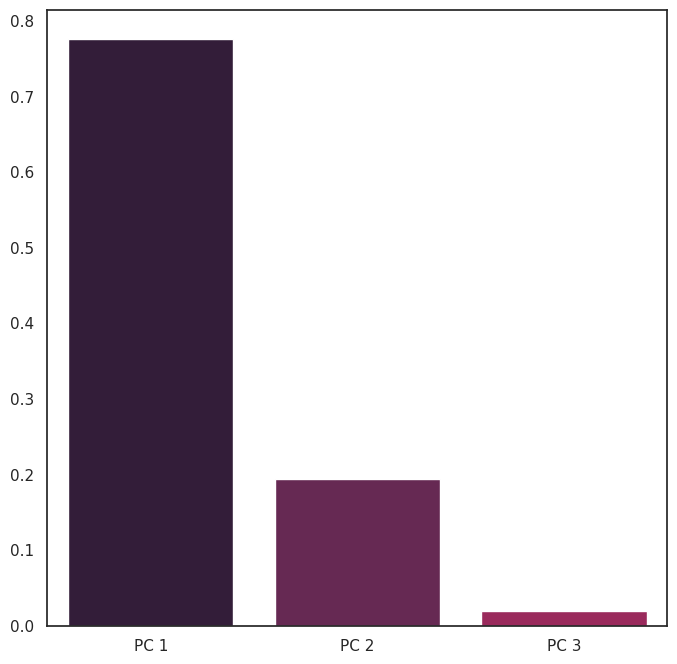

In [22]:
# and let's visualize that using the seaborn library
import seaborn as sns

sns.set(rc={"figure.figsize":(8, 8)})
sns.set_style("white")
sns.set_palette('rocket')

sns.barplot(x=['PC 1', 'PC 2', 'PC 3'], y=pca.explained_variance_ratio_)

# Explanations
What we can see is that the first component explains the largest amount of variability. This is by design. 

PCA transformation tries to find the rotation of the space so that the first component explains the most variability. It also seeks the dimensions that are orthogonal, which does not always mean that it can find it - as not all data is essentially orthogonal. 

Therefore the second component explain less variability, third even less and so on. 

# t-SNE - similar to PCA, but different

Another transformation, which we also mentioned a bit is the non-linear transformation t-SNE. 

In [23]:
# for t-SNE, we use the same data as we used previously
# i.e., the predictor dfDataAnt13Pred
from sklearn.manifold import TSNE

# we create the t-sne transformation with three components
# just like we did with the PCA
tsne = TSNE(n_components = 3)

# we fit and transform the data 
dfDataAnt13TSNE = tsne.fit_transform(dfDataAnt13Pred)

# and print the three first rows
dfDataAnt13TSNE[:3]

# in t-SNE transformation, there is no way to calculate the variance 
# that is explained by it, simply because it is not
# a linear transformation, but a neural network that
# we use to train to fit to the data

array([[-89.95845  ,  13.306955 , -25.787376 ],
       [ 32.589516 ,   6.909334 ,   5.013461 ],
       [  0.6079514,  -1.7553657, -75.00529  ]], dtype=float32)

# ICA - Independent component analysis

In [26]:
# we import the package
from sklearn.decomposition import FastICA

# instantiate the ICA
ica = FastICA(n_components=3)

# transform the data
dfDataAnt13ICA = ica.fit_transform(dfDataAnt13Pred)

# and check the first three rows
dfDataAnt13ICA[:3]

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


array([[ 0.06411178,  0.02589526,  0.00375669],
       [-0.09575154, -0.00283651,  0.0110904 ],
       [ 0.02897812, -0.09246417,  0.6711594 ]])

# LLE - Locally Linear Embeddings

In [30]:
from sklearn.manifold import LocallyLinearEmbedding

# instantiate the classifier
lle = LocallyLinearEmbedding(n_components=3)

# transform the data
dfDataAnt13LLE = lle.fit_transform(dfDataAnt13Pred)

# print the three first rows
dfDataAnt13LLE[:3]

array([[-0.04541501, -0.00255288, -0.14605099],
       [-0.00179851, -0.01478851,  0.07942359],
       [ 0.21896874,  0.72847126,  0.00620847]])

# LDA - Latent Discriminant Analysis


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# create the classifier
# please note that we can only use one component, because
# we have only one predicted variable
lda = LinearDiscriminantAnalysis(n_components=1)

# fit to the data 
# please note that this transformation requires the predicted 
# variable too
dfDataAnt13LDA = lda.fit(dfDataAnt13Pred, dfDataAnt13.Defect).transform(dfDataAnt13Pred)

# print the transformed data
dfDataAnt13LDA[:3]

array([[ 1.01666033],
       [ 0.44195808],
       [-1.07204839]])